In [1]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from models import SimpleRNN, LSTM
#from lstm_models import LSTM
import utils_2 as ut2
from traindata import trainData
import errores as er



#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
from sklearn.svm import SVR
import pickle

sns.set_style("darkgrid")


import numpy as np
from tqdm import tqdm



np.random.seed(seed=77)

In [2]:
#fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
#fpath ='/Users/falconlab/Documents/GitHub/Tesis/data/low/'
fname = "file1_080124.mat"
#cutoff = [8/1000, 11/1000]

data = trainData(fpath, fname, 'Amplitude')
train, val, test = data.split_data('Amplitude')


import copy

train = utils.subsample(train, 2)
test = utils.subsample(test, 2)

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

test = copy.deepcopy(test_scaled)

x_train, y_train = ut2.create_sequences(train_scaled[:], 1000, 1)
x_test, y_test = ut2.create_sequences(test_scaled, 1000, 1)


0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Length: 600000, dtype: float64
0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Length: 600000, dtype: float64
0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Length: 600000, dtype: float64
0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Len

In [3]:
filename = 'GBoost_model.sav'
model = pickle.load(open(filename, 'rb'))


## **predicciones a 50 steps**

In [4]:
steps = 50
x_test , y_test = ut2.create_sequences(test, 1000, steps)
y_test = y_test.squeeze()

In [5]:
test50 = ut2.rollingWindowPrediction_SVR(model, x_test, steps)
np.savetxt("test50_GBoostt.csv", test50, delimiter=",")

  0%|          | 0/43951 [00:00<?, ?it/s]

100%|██████████| 43951/43951 [14:01<00:00, 52.23it/s]


In [6]:
mse, mape, r2, rmse = er.calculate_errors(test50, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.0023052888351321158
Mean Absolute Percentage Error: 0.5511972687606752
R2 Score: 0.6104799709648507
Root Mean Squared Error: 0.040643419324914234


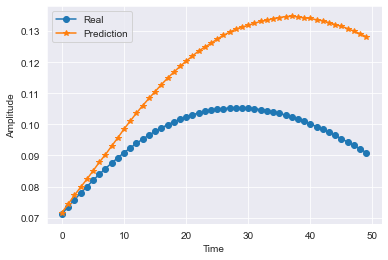

In [7]:
i = 1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test50[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **predicciones a 100 steps**

In [8]:
steps = 100
x_test , y_test = ut2.create_sequences(test, 1000, steps)
y_test = y_test.squeeze()

In [9]:
test100 = ut2.rollingWindowPrediction_SVR(model, x_test, steps)
np.savetxt("test100_GBoost.csv", test100, delimiter=",")

100%|██████████| 43901/43901 [27:26<00:00, 26.66it/s]


In [10]:
mse, mape, r2, rmse = er.calculate_errors(test100, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.0036976442079751978
Mean Absolute Percentage Error: 0.707765015593241
R2 Score: 0.37576005454838746
Root Mean Squared Error: 0.05594361339394302


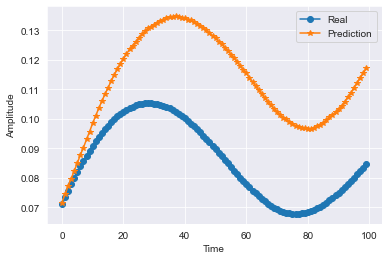

In [11]:
i = 1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test100[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **Predicciones a 500 steps**

In [12]:
steps = 500
x_test , y_test = ut2.create_sequences(test, 1000, steps)
y_test = y_test.squeeze()

In [13]:
test500 = ut2.rollingWindowPrediction_SVR(model, x_test, steps)
np.savetxt("test500_GBoost.csv", test500, delimiter=",")

100%|██████████| 43501/43501 [2:16:07<00:00,  5.33it/s]  


In [14]:
mse, mape, r2, rmse = er.calculate_errors(test500, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.005865267456915614
Mean Absolute Percentage Error: 0.9213564743697331
R2 Score: 0.014705026781684375
Root Mean Squared Error: 0.07519423430729202


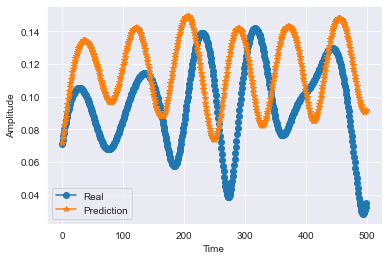

In [15]:
i = 1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test500[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **Predicciones a 1000 steps**

In [16]:
#steps = 1000
#x_test , y_test = ut2.create_sequences(test, 1000, steps)
#y_test = y_test.squeeze()
#test1000 = ut2.rollingWindowPrediction_SVR(model, x_test, steps)
#np.savetxt("test1000_SVR.csv", test1000, delimiter=",")

In [17]:
#mse, mape, r2, rmse = er.calculate_errors(test1000, y_test)
#print(f'Mean Squared Error: {mse}')
#print(f'Mean Absolute Percentage Error: {mape}')
#print(f'R2 Score: {r2}')
#print(f'Root Mean Squared Error: {rmse}')

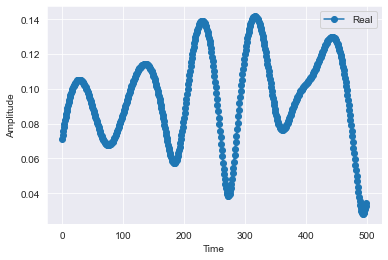

In [18]:
i = 1
plt.plot(y_test[i], 'o-',label='Real')
#plt.plot(test100[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()